In [1]:
from ondepi.applications import price_level as pl
from ondepi.visualisations import sample as plot_sample
from ondepi.resources import utils

In [2]:
symbol = 'INTC'
date = '2019-01-31'
price_level = 466000
direction = 1
std_size = 500
t0 = 1.05e3
t1 = 1.50e3
reset_time_origin = True

In [3]:
queue = pl.init_queue_on_lobster_data(
    symbol=symbol, date=date,
    price_level=price_level, direction=direction, std_size=std_size,
    t0=t0, t1=t1, reset_time_origin=reset_time_origin
)

symbol: INTC
date: 2019-01-31
direction: 1
price_level: 466000
std_size: 500
reset_time_origin: True


In [4]:
queue = pl.set_param(queue)

In [5]:
df = queue.get_df_sample()

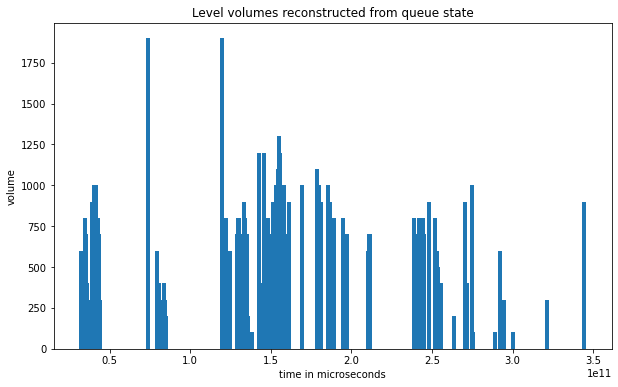

In [6]:
ax = plot_sample.plot_reconstructed_volumes(df, time_i_range=None)

In [42]:
queue.simulate(max_time=10.0e3, max_events=10.0e3, first_event=1, first_state=5)

In [43]:
df = queue.get_df_sample()

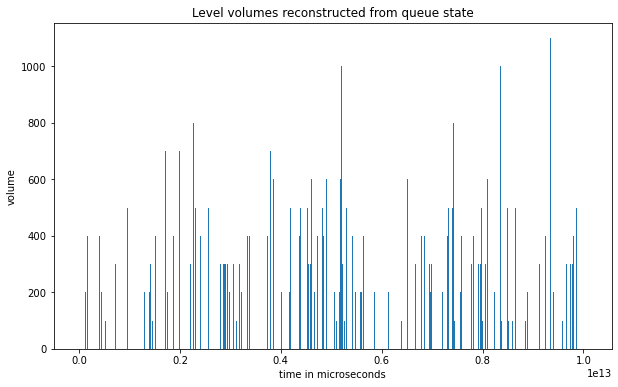

In [44]:
ax = plot_sample.plot_reconstructed_volumes(df, time_i_range=None)

In [45]:
queue.filter(dt=7.5e-3, num_states=30)

In [46]:
df = pl.produce_df_detection(queue, beta=1.0e-2)

In [47]:
df

,idx,time sample,time filter,state,expected val,predictor,error
0,0,0.000000,0.000000,5,5.000000,5.000000,0.000000
1,581358,58.135804,58.135804,4,6.337271,5.329825,-1.329825
2,738788,73.878803,73.878803,5,6.971173,5.803690,-0.803690
3,766411,76.641110,76.641110,4,6.081858,5.862149,-1.862149
4,885638,88.563826,88.563826,5,6.562141,6.069367,-1.069367
...,...,...,...,...,...,...,...
1887,98631837,9863.183773,9863.183773,4,13.029478,12.206426,-8.206426
1888,98638940,9863.894037,9863.894037,3,12.901405,12.249256,-9.249256
1889,98650200,9865.020000,9865.020000,2,12.236527,12.248555,-10.248555
1890,98671277,9867.127744,9867.127744,1,10.646034,12.153052,-11.153052


In [48]:
df.describe()

,idx,time sample,time filter,state,expected val,predictor,error
count,1.892000e+03,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,5.009680e+07,5009.680409,5009.680409,2.421776,15.448510,10.774314,-8.352538
std,2.747111e+07,2747.111307,2747.111307,1.985327,5.400503,6.613117,6.688916
min,0.000000e+00,0.000000,0.000000,0.000000,0.401825,0.999786,-22.873009
25%,2.812399e+07,2812.399209,2812.399209,1.000000,11.947768,3.800736,-13.538476
50%,4.908927e+07,4908.926805,4908.926805,2.000000,15.769096,10.909978,-8.233728
75%,7.513752e+07,7513.752286,7513.752286,3.000000,19.945085,16.171181,-2.272973
max,9.914288e+07,9914.288436,9914.288436,11.000000,25.360199,23.054171,6.104253


<AxesSubplot:>

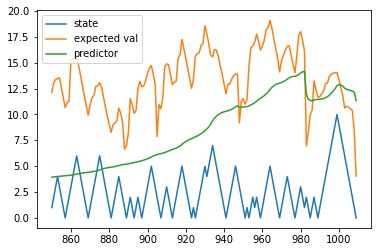

In [53]:
df[['state', 'expected val', 'predictor']].iloc[850:1010,:].plot()

In [51]:
df_intensity = queue.get_df_intensity_process()

<AxesSubplot:xlabel='time'>

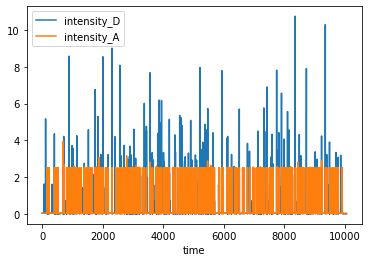

In [52]:
df_intensity.set_index('time').plot()